# 11월 1일 스터디 2회차 문제풀이

In [2]:
import pandas as pd
import numpy as np

In [3]:
titan= pd.read_csv('titanic/train.csv')

In [4]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
titan.info() #데이터 살펴보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 변수해석부터!!
#0 : 승객 이름, 1 : 생존 여부, 2: 승객 등급, 3: 이름, 4: 성별,
#5: 나이, 6:사촌+배우자의 수,
#7: 부모님+아이들의 수, 8: 티켓번호, 9: 요금, 10: 선실, 11: 선착장(어디서 탔는지)

### 1. '고소득층(high_income)으로 분류되는 남성과 여성 각각의 생존율을 구하고, 그 수치를 막대그래프를 이용하여 시각화하시오.'¶(단, 고소득층(high_income)은 'Fare'가 전체 승객 내에 상위 25% 안에 들며, 'Pclass'가 1등급인 사람을 지칭한다.) (찬웅)

In [6]:
import pandas as pd
import numpy as np

In [7]:
titan = pd.read_csv('titanic/train.csv')

In [8]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titan['Fare'].describe() #Fare는 type이 float이기 때문에 describe을 써서 대략의 통계치 확인!

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
titan['Pclass'].value_counts() #Pclass 변수의 항목별 수량 및 값의 종류 확인

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
high_income = (titan['Fare'] >= 31) & \
               (titan['Pclass'] == 1) #high_income을 만족하는 두가지 변수의 조건식

In [10]:
high_income.value_counts() #전체 데이터 내에 high_income 인 사람의 수 확인 (162명)

False    729
True     162
dtype: int64

In [11]:
titan1 = titan.assign(high_income = (titan['Fare'] >= 31) & \
               (titan['Pclass'] == 1)) #high_income 항목을 추가한 새로운 DF titan1 생성

In [13]:
titan1['high_income'] #high_income 값이 True, False로 들어가 있다는 점 확인

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: high_income, Length: 891, dtype: bool

In [14]:
titan['high_income']=np.where(titan1['high_income']==True, 'high', 'low')
#high_income의 값을 True,False가 아닌 high,low로 바꿈으로써 차후 그래프 도출 시 직관성을 둠.

In [15]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,high_income
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,high
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,high
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,low
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,low
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,low
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,low


In [19]:
titan1.groupby(['high_income','Sex'])['Survived'].value_counts()
# titan1의 데이터를 high_income, Sex별로 재분류 후 살펴본 생존자수

high_income  Sex     Survived
False        female  1           148
                     0            79
             male    0           419
                     1            83
True         female  1            85
                     0             2
             male    0            49
                     1            26
Name: Survived, dtype: int64

In [16]:
titan1.groupby(['high_income','Survived'])['Sex'].value_counts()
# titan1의 데이터를 high_income, survived별로 재분류 후 살펴본 해당 항목의 성별 사람의 수

high_income  Survived  Sex   
False        0         male      419
                       female     79
             1         female    148
                       male       83
True         0         male       49
                       female      2
             1         female     85
                       male       26
Name: Sex, dtype: int64

In [18]:
t_survived=titan.groupby(['high_income','Sex'],\
                          as_index =False) \
                         ['Survived'].mean()
#문제에서 요구한 high_income과 성별 분류 후 살펴본 생존율 데이터를 
#데이터프레임화 한 것이 t_survived

In [22]:
t_survived

,high_income,Sex,Survived
0,high,female,0.977011
1,high,male,0.346667
2,low,female,0.651982
3,low,male,0.165339


In [19]:
t_survived=t_survived.sort_values(by = ['high_income', 'Sex'], \
                      ascending = [False,False])
#변수 항목을 재정렬해 직관성을 높임.
#결국 문제에서 요구하는 수치는 high_income이 high를 만족할때 성별 생존율!!

In [21]:
t_survived

,high_income,Sex,Survived
3,low,male,0.165339
2,low,female,0.651982
1,high,male,0.346667
0,high,female,0.977011


In [22]:
import seaborn as sns

In [23]:
t_survived

,high_income,Sex,Survived
3,low,male,0.165339
2,low,female,0.651982
1,high,male,0.346667
0,high,female,0.977011


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

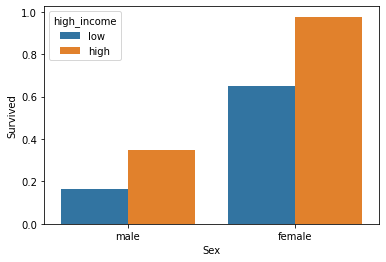

In [27]:
sns.barplot(data=t_survived, x= 'Sex',\
            y='Survived',  hue = 'high_income')
#seaborn 의 barplot을 이용한 high_income 대비 성별 생존율 그래프 가시화

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

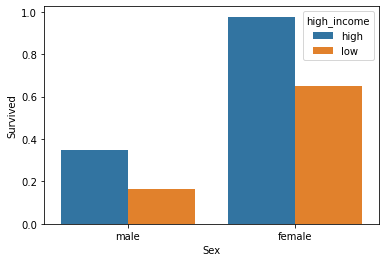

In [30]:
sns.barplot(data=t_survived, x= 'Sex',\
    hue = 'high_income', hue_order = [ 'high', 'low'],\
           order = ['male', 'female'], y='Survived')
#barplot의 항목들을 좀 더 보기쉽게 재정렬!! (order, 와 hue_order를 사용)

------------------------------------

In [31]:
import pandas as pd

In [32]:
titan = pd.read_csv('titanic/train.csv')

In [33]:
titan.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titan['Age'].isnull().sum() #'Age'항목의 null값 확인

177

In [35]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
titan['Age4'] = titan['Age'].fillna(titan['Age'].median())

In [37]:
titan['Age4'].sum()

26161.17

In [32]:
titan_1 = titan['Age'].isnull()

In [33]:
titan_2=titan[titan['Age'].isnull()]

In [34]:
titan_2.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,high_income
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,low
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,low
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,low
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,low
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,low
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,low
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,high
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,low
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,low
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,low


In [41]:
pd.DataFrame(titan_1)

,Age
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,True
889,False


In [42]:
titan['Age3'] = titan['Age'].fillna(titan.groupby('Sex')['Age'].transform('median'))

In [43]:
titan['Age3'][5]

29.0

In [44]:
titan['Age3'][19] #Age3에 male female 변수에 각각 다른 값이 들어간 것을 확인!!

27.0

In [45]:
titan['Age3'].sum()

26232.17

In [46]:
titan.groupby('Sex')['Age']

In [48]:
titan['Age3'].isnull().sum()

0

In [49]:
titan[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [50]:
titan1['Age'].isnull().sum()

177

In [51]:
import numpy as np

In [52]:
titan['Age_group'] = np.where(titan['Age3']>= 50, 'over 50s',
                     np.where(titan['Age3']>= 40, '40s',
                     np.where(titan['Age3']>= 30, '30s',
                     np.where(titan['Age3']>= 20, '20s',
                     np.where(titan['Age3']>= 10, 'teens', 'kids')))))

In [53]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age4,Age3,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,30s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0,20s
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,teens
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,27.0,20s
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0,20s


In [54]:
titan.groupby(['Pclass', 'Age_group'])['Survived'].mean()

Pclass  Age_group
1       20s          0.593750
        30s          0.780000
        40s          0.594595
        kids         0.666667
        over 50s     0.454545
        teens        0.833333
2       20s          0.406250
        30s          0.395833
        40s          0.555556
        kids         1.000000
        over 50s     0.315789
        teens        0.500000
3       20s          0.241636
        30s          0.217391
        40s          0.058824
        kids         0.452381
        over 50s     0.090909
        teens        0.257576
Name: Survived, dtype: float64

In [55]:
df2 = titan.groupby(['Pclass', 'Age_group'])['Survived'].mean().reset_index()

In [75]:
df2['Survived'] = df2['Survived'] *100

In [76]:
df2

,Pclass,Age_group,Survived
0,1,20s,59.375000
1,1,30s,78.000000
2,1,40s,59.459459
3,1,kids,66.666667
4,1,over 50s,45.454545
5,1,teens,83.333333
6,2,20s,40.625000
7,2,30s,39.583333
8,2,40s,55.555556
9,2,kids,100.000000


------------------------------------

In [58]:
titan[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [59]:
titan['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [60]:
titan['Fare'].quantile(.25)

7.9104

In [61]:
iqr = titan['Fare'].quantile(.75) - titan['Fare'].quantile(.25)

In [62]:
iqr

23.0896

In [63]:
error = titan['Fare'].quantile(.75) + (iqr * 1.5) 

In [64]:
titan['fare2'] = np.where(titan['Fare'] < error, titan['Fare'], None)

In [65]:
titan[['fare2']].isnull().sum()

fare2    116
dtype: int64

In [66]:
titan['fare_grade'] =np.where(titan['fare2']>titan['fare2'].quantile(.66), "A",
            np.where(titan['fare2']>titan['fare2'].quantile(.33), "B", "C"))

In [67]:
titan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age4,Age3,Age_group,fare2,fare_grade
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,20s,7.25,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,30s,None,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,20s,7.925,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,30s,53.1,A
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,30s,8.05,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0,20s,13.0,B
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0,teens,30.0,A
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,28.0,27.0,20s,23.45,A
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0,20s,30.0,A


In [68]:
titan.groupby('fare_grade')['Survived'].mean() * 100

fare_grade
A    46.212121
B    36.725664
C    34.164589
Name: Survived, dtype: float64

In [69]:
data1 = titan.groupby('fare_grade')['Survived'].mean() * 100

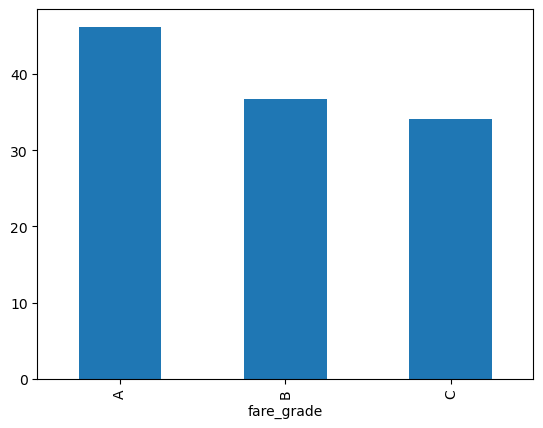

In [70]:
data1.plot.bar();

In [81]:
data2=data1.reset_index()

<AxesSubplot:xlabel='fare_grade', ylabel='Survived'>

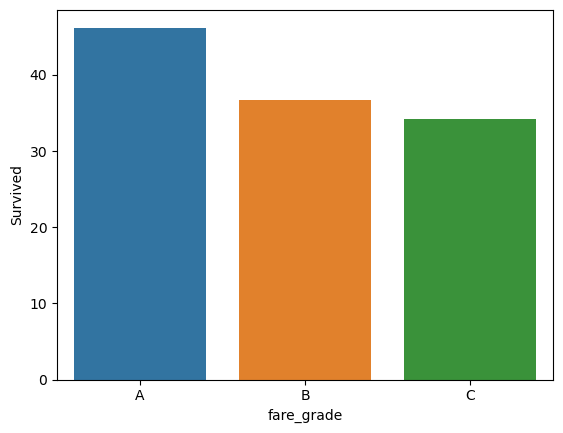

In [82]:
sns.barplot(data=data2, x = 'fare_grade', y ='Survived' )